## HDFC Life Challenge

### Problem Staement :

Reddit is a social news aggregation and discussion website. Reddit's registered community members can submit content such as text posts or direct links.
Content entries are organized by areas of interest called "Subreddits". Subreddit topics include news, science, gaming, movies, music, books, fitness, food, image-sharing and many others.

The goal of this assignment is to recommend users the subreddit they should subscribe to.

In [1]:
#Import all the necessary packages
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
%matplotlib inline

In [2]:
#load the csv file and convert it to dataframe
def csv_to_df(filepath):
    df = pd.read_csv(filepath)
    return df

df = csv_to_df('/home/nikita/Documents/reddit_data.csv')

In [3]:
df

,username,subreddit,utc
0,kabanossi,photoshopbattles,1.482748e+09
1,kabanossi,GetMotivated,1.482748e+09
2,kabanossi,vmware,1.482748e+09
3,kabanossi,carporn,1.482748e+09
4,kabanossi,DIY,1.482747e+09
5,kabanossi,food,1.482747e+09
6,kabanossi,CatastrophicFailure,1.482514e+09
7,kabanossi,photoshopbattles,1.482514e+09
8,kabanossi,carporn,1.482513e+09
9,kabanossi,techsupport,1.482513e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000000 entries, 0 to 13999999
Data columns (total 3 columns):
username     object
subreddit    object
utc          float64
dtypes: float64(1), object(2)
memory usage: 320.4+ MB


In [5]:
#finding unique subreddits
df['subreddit'].unique()

array(['photoshopbattles', 'GetMotivated', 'vmware', ..., 'viacoin',
       'PlanktonFOOD', 'dogebetting'], dtype=object)

In [6]:
#in the given df, there are 34,967 unique subreddits are present
print pd.value_counts(df['subreddit'].unique()).sum()

34967


In [7]:
#Df has 22,610 unique users 
print pd.value_counts(df['username'].unique()).sum()

22610


In [8]:
#There are no missing value in the dataframe
print df.isnull().sum()

username     0
subreddit    0
utc          0
dtype: int64


In [9]:
#Coumputing and trying to detect outliers using UTC column
df.describe()

,utc
count,1.400000e+07
mean,1.466360e+09
std,2.489116e+07
min,1.152578e+09
25%,1.463470e+09
50%,1.475936e+09
75%,1.480630e+09
max,1.483188e+09


### As its not a time series problem, thus dropping the UTC time column.

In [10]:
df = df.drop(['utc'], axis = 1)

In [11]:
df

,username,subreddit
0,kabanossi,photoshopbattles
1,kabanossi,GetMotivated
2,kabanossi,vmware
3,kabanossi,carporn
4,kabanossi,DIY
5,kabanossi,food
6,kabanossi,CatastrophicFailure
7,kabanossi,photoshopbattles
8,kabanossi,carporn
9,kabanossi,techsupport


In [12]:
#Dividing dataset into small dataframes
df1 = df.iloc[:350000,:]
# df2 = df.iloc[3500000:7000001,:]
# df3 = df.iloc[7000001:14000001,:]
# df3

### Grouping the subreddit according to each user and also calculating count value of each subreddit by that particular user

In [13]:

subreddits_per_user1 = df1.groupby(['username'])['subreddit'].value_counts()
subreddits_df1 = pd.DataFrame(subreddits_per_user1)
subreddits_df1
new_1 = subreddits_df1.reset_index(level = 0, drop = False)
new_1.rename(columns = {'subreddit':'counts'}, inplace=True)
new_1 = new_1.reset_index()
new_1


,subreddit,username,counts
0,worldnews,-SA-HatfulOfHollow,11
1,news,-SA-HatfulOfHollow,1
2,reddevils,-SA-HatfulOfHollow,1
3,soccer,-SA-HatfulOfHollow,1
4,AskReddit,-Stormcloud-,38
5,pokemongo,-Stormcloud-,26
6,pokemon,-Stormcloud-,24
7,asoiaf,-Stormcloud-,21
8,WoT,-Stormcloud-,20
9,friendsafari,-Stormcloud-,20


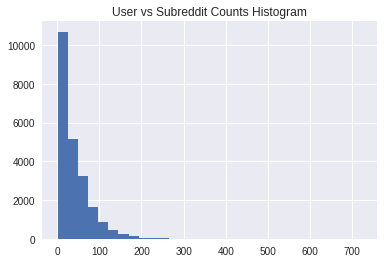

In [14]:
user_subs = df.groupby(['username'])['subreddit'].nunique()
user_subs
plt.hist(user_subs.values, bins=30)
plt.title("User vs Subreddit Counts Histogram")
plt.show()

In [15]:
#creating a dataframe which contains only subreddit name
sub_df = pd.DataFrame(new_1['subreddit'])
sub_df['subreddit Id'] = sub_df.index + 1
sub_df = sub_df[['subreddit Id','subreddit']]
sub_df


,subreddit Id,subreddit
0,1,worldnews
1,2,news
2,3,reddevils
3,4,soccer
4,5,AskReddit
5,6,pokemongo
6,7,pokemon
7,8,asoiaf
8,9,WoT
9,10,friendsafari


## Recommender System using Collaborative Filtering

Collaborative filtering, also referred to as social filtering, filters information by using the recommendations of other people. It is based on the idea that people who agreed in their evaluation of certain items in the past are likely to agree again in the future. 

### Creating Sparse matrix 


Let's create a pivot table of subreddit to Users
The rows are subreddit and columns are users. And the values in the matrix are the counts for a specific subreddit by a specific user.



In [16]:

pivot_1 = new_1.pivot(index='subreddit', columns='username', values='counts').fillna(0)
pivot_1 = pivot_1.reset_index(drop=True)
pivot_1

username,-SA-HatfulOfHollow,-Stormcloud-,-_-_-_-otalp-_-_-_-,-goodguygeorge,01is,0mn17h3047,2d2c,414D59,62718743217326214821,777louisdeal,...,xkcd_transcriber,xxsandmanxx,yd-oc,yescalculators,ygtsrt,yzlautum,zaviex,zerkle,zestysock,zombiegamer723
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
pivot_1.shape

(5508, 550)

## Item based Collaborative Filtering


Item-based collaborative filtering is a model-based algorithm for making recommendations. In the algorithm, the similarities between different items in the dataset are calculated by using one of a number of similarity measures, and then these similarity values are used to predict ratings for user-item pairs not present in the dataset.

#### Similarities between items

The similarity values between items are measured by observing all the users who have rated both the items. The similarity between two items is dependent upon the ratings given to the items by users who have rated both of them.

### Calculating the item distances and similarities

In [18]:
subreddit_sim = 1 - pairwise_distances( pivot_1.as_matrix(), metric="correlation" )
subreddit_sim


array([[ 1.        , -0.00209678, -0.00272725, ..., -0.00209678,
        -0.00209678, -0.00209678],
       [-0.00209678,  1.        , -0.00236919, ..., -0.00182149,
        -0.00182149, -0.00182149],
       [-0.00272725, -0.00236919,  1.        , ..., -0.00236919,
        -0.00236919, -0.00236919],
       ..., 
       [-0.00209678, -0.00182149, -0.00236919, ...,  1.        ,
        -0.00182149, -0.00182149],
       [-0.00209678, -0.00182149, -0.00236919, ..., -0.00182149,
         1.        , -0.00182149],
       [-0.00209678, -0.00182149, -0.00236919, ..., -0.00182149,
        -0.00182149,  1.        ]])

In [19]:
subreddit_sim.shape

(5508, 5508)

In [20]:
subreddit_sim_df = pd.DataFrame(subreddit_sim)
subreddit_sim_df

,0,1,2,3,4,5,6,7,8,9,...,5498,5499,5500,5501,5502,5503,5504,5505,5506,5507
0,1.000000,-0.002097,-0.002727,-0.002097,-0.002369,-0.002097,-0.002097,-0.002097,-0.002097,0.146028,...,-0.005625,-0.002790,0.048156,-0.002428,-0.002544,-0.003446,-0.002097,-0.002097,-0.002097,-0.002097
1,-0.002097,1.000000,-0.002369,-0.001821,-0.002058,-0.001821,-0.001821,-0.001821,-0.001821,-0.002749,...,-0.004887,-0.002424,-0.005811,-0.002109,-0.002210,-0.002993,-0.001821,-0.001821,-0.001821,-0.001821
2,-0.002727,-0.002369,1.000000,-0.002369,-0.002677,-0.002369,-0.002369,-0.002369,-0.002369,-0.003576,...,-0.006356,-0.003152,-0.007559,-0.002743,-0.002874,-0.003893,-0.002369,-0.002369,-0.002369,-0.002369
3,-0.002097,-0.001821,-0.002369,1.000000,-0.002058,-0.001821,-0.001821,-0.001821,-0.001821,-0.002749,...,-0.004887,-0.002424,-0.005811,-0.002109,-0.002210,-0.002993,-0.001821,-0.001821,-0.001821,-0.001821
4,-0.002369,-0.002058,-0.002677,-0.002058,1.000000,-0.002058,-0.002058,0.996692,-0.002058,-0.003106,...,-0.005521,-0.002738,-0.006566,-0.002383,-0.002497,-0.003382,-0.002058,-0.002058,-0.002058,-0.002058
5,-0.002097,-0.001821,-0.002369,-0.001821,-0.002058,1.000000,-0.001821,-0.001821,-0.001821,-0.002749,...,0.239456,-0.002424,-0.005811,-0.002109,-0.002210,-0.002993,-0.001821,-0.001821,-0.001821,-0.001821
6,-0.002097,-0.001821,-0.002369,-0.001821,-0.002058,-0.001821,1.000000,-0.001821,-0.001821,-0.002749,...,-0.004887,-0.002424,-0.005811,-0.002109,-0.002210,-0.002993,-0.001821,-0.001821,-0.001821,-0.001821
7,-0.002097,-0.001821,-0.002369,-0.001821,0.996692,-0.001821,-0.001821,1.000000,-0.001821,-0.002749,...,-0.004887,-0.002424,-0.005811,-0.002109,-0.002210,-0.002993,-0.001821,-0.001821,-0.001821,-0.001821
8,-0.002097,-0.001821,-0.002369,-0.001821,-0.002058,-0.001821,-0.001821,-0.001821,1.000000,-0.002749,...,-0.004887,-0.002424,-0.005811,-0.002109,-0.002210,-0.002993,-0.001821,-0.001821,-0.001821,-0.001821
9,0.146028,-0.002749,-0.003576,-0.002749,-0.003106,-0.002749,-0.002749,-0.002749,-0.002749,1.000000,...,-0.007376,-0.003658,-0.008771,-0.003183,-0.003335,-0.004518,-0.002749,-0.002749,-0.002749,-0.002749


### Finding similar subreddit to worldnews

In [21]:

sub_df['similarity'] = subreddit_sim_df.iloc[0]
sub_df.columns = ['subreddit ID','subreddit','similarity']
sub_df.head(20)


,subreddit ID,subreddit,similarity
0,1,worldnews,1.000000
1,2,news,-0.002097
2,3,reddevils,-0.002727
3,4,soccer,-0.002097
4,5,AskReddit,-0.002369
5,6,pokemongo,-0.002097
6,7,pokemon,-0.002097
7,8,asoiaf,-0.002097
8,9,WoT,-0.002097
9,10,friendsafari,0.146028


In [22]:
sub_df.sort_values( ["similarity"], ascending = False )[0:5]

,subreddit ID,subreddit,similarity
0,1,worldnews,1.000000
3553,3554,heroesofthestorm,0.986386
506,507,learnmath,0.986386
2026,2027,KansasCityChiefs,0.986386
138,139,ifiwonthelottery,0.986386


#### That means anyone who subscribe for worldnews , the top 3 subreddit that can be recommender to him or her are heroesofthestorm(3553), learnmath(506), KansasCityChiefs(2026)

## utility function that will give similar subreddit

In [23]:
def get_similar_subreddit( subreddit, topN = 5 ):
    sub_df['similarity'] = subreddit_sim_df.iloc[subreddit-1]
    top_n = sub_df.sort_values( ["similarity"], ascending = False )[0:topN]
    print( "Similar subreddit to:",subreddit )
    return top_n

In [24]:
get_similar_subreddit(3,10) #get recommendation for subreddit similar to Reddevils

('Similar subreddit to:', 3)


,subreddit ID,subreddit,similarity
2,3,reddevils,1.000000
3536,3537,trashyboners,0.928384
2262,2263,ColoradoRockies,0.928384
3870,3871,watchpeopledie,0.928384
2375,2376,meirl,0.928384
4216,4217,malefashionadvice,0.928384
62,63,Fuck2016,0.928384
995,996,thatHappened,0.928384
2039,2040,todayilearned,0.928384
3074,3075,Twitch,0.928384


In [25]:
get_similar_subreddit(20) # top 5 recommendation for subreddit similar to soccer

('Similar subreddit to:', 20)


,subreddit ID,subreddit,similarity
19,20,soccer,1.000000
5233,5234,gifs,0.938245
5224,5225,fatlogic,0.938212
18,19,darksouls3,0.926333
2872,2873,reactiongifs,0.922446


The item similarity has been able to find out the subreddit that can be recommended. 

## Pros and Cons of Collaborative Filtering:

### __Pros__:  
           * minimum domain knowledge required
           * User and item Feature are not required
           * produces good enough result in most of the cases
           
### __Cons__:  
           * Needs standardized products
           * Requires high User to item Ratio
           * Popularity Bias
           
           
 